In [1]:
#Hier weren die Daten geladen

import numpy as np
import os

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/240_Hysterese" #Directory
Messdaten = "240b_My_A.txt" #Dateiname

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen (funktioniert nur, wenn da genau richtig viele columb stehen)
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte

#definiere N als Anzahl der Messwertpaare
N=len(columb1)
print("length comumb1:", len(columb1))
print("length comumb2:", len(columb2))
print("length comumb3:", len(columb3))
print("N:", N)

x_data = columb2
y_data = columb3

print("x_data:" , x_data)
print("y_data:" , y_data)

My current directory is : /home/jovyan/Praktikum_P2/240_Hysterese
My directory name is : 240_Hysterese
[[ 0.000e+00  0.000e+00 -1.000e+00        nan]
 [ 0.000e+00 -1.500e-03 -1.000e+00        nan]
 [ 1.000e-01  0.000e+00 -1.500e+00        nan]
 [ 2.010e-01 -1.500e-03 -1.000e+00        nan]
 [ 3.010e-01 -1.500e-03 -1.500e+00        nan]
 [ 4.010e-01 -1.500e-03 -1.000e+00        nan]
 [ 5.010e-01  0.000e+00 -1.500e+00        nan]
 [ 6.010e-01  1.500e-03 -1.500e+00        nan]
 [ 7.010e-01  0.000e+00 -1.000e+00        nan]
 [ 8.010e-01  0.000e+00 -1.000e+00        nan]
 [ 9.010e-01 -1.500e-03 -1.000e+00        nan]
 [ 1.001e+00  0.000e+00 -1.000e+00        nan]
 [ 1.101e+00  0.000e+00 -1.000e+00        nan]
 [ 1.201e+00 -1.500e-03 -1.000e+00        nan]
 [ 1.301e+00  0.000e+00 -1.000e+00        nan]
 [ 1.401e+00  0.000e+00 -1.000e+00        nan]
 [ 1.501e+00 -1.500e-03 -1.000e+00        nan]
 [ 1.601e+00  1.500e-03 -1.000e+00        nan]
 [ 1.701e+00  0.000e+00 -1.500e+00        nan]
 [ 1

In [2]:
#240_c

#gemessene Werte
t = columb1
print("Zeit t:", t)
#print("Lenght t:", len(t))

I = columb2
print("Stromstaerke I:", I)
#print("Length I:", len(I))

B = (-columb3)/1000 #umrechnung in Tesla (SI-Einweit, damit die Formeln stimmen) und Graph an x-Achse
print("Magnetische Flussdichte B:", B)
#print("Lenght B:", len(B))

#gegebene Werte für die Formlen:
N = 2*500 #Gesammtwindungszahl aus 2 Spule zusammengesetzt
l_Fe = 0.477 #Länge eines Weges durch die Mitte des Eisenkerns in Meter (Laut Anleitung: 477 +- 4mm)
My_0 = 1.25663706212e-6 #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
d = 0.002 #Dicke des Spaltes in Meter (Laut Anleitung: 2 +- 0,05 mm)

#Berechnung der magnetischen Feldstärke
H = ((N*I)/l_Fe)-(d/(My_0*l_Fe))*B #Formel: 240.2 S.50
print("Magnetische Feldstärke H:", H)

#Fehlerrechnung
N_err = 0 #0, da Natürliche Zahl
print("Fehler auf N:", N_err)
l_Fe_err=4/1000 # in Meter
print("Fehler auf l_Fe:", l_Fe_err)
My_0_err= 1.9*10**(-10)*10**(-6) #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
print("Fehler auf My_0:", My_0_err)
d_err=0.05/1000 # in Meter
print("Fehler auf d:", d_err)
I_err=I*0.01 #1% des Messwertes
print("Fehler auf I:", I_err)
B_err=B*0.03 #3% des Messwertes bei 20°C
print("Fehler auf B:", B_err)

#Fehlerquadrate der einzelnen Ableitungen(Teilergebnisse für H_err)
s1 = (N/l_Fe)*I_err #H nach I ableiten
s2 = (-B/(My_0*l_Fe))*d_err #H nach d ableiten
s3 = (-d/(My_0*l_Fe))*B_err #H nach B ableiten
s4 = ((B*d-I*My_0*N)/(My_0*l_Fe**2))*l_Fe_err #H nach l_Fe ableiten
s5 = ((d)/(My_0**2*l_Fe))*My_0_err #H nach My0 ableiten


#Fehler auf die magnetische Fledstärke
H_err = (s1**2+s2**2+s3**2+s4**2+s5**2)**(1/2)
print("Fehler auf H:", H_err)

x_data = H
y_data = B
x_err = H_err
y_err = B_err

Zeit t: [0.    0.    0.1   0.201 0.301 0.401 0.501 0.601 0.701 0.801 0.901 1.001
 1.101 1.201 1.301 1.401 1.501 1.601 1.701 1.801 1.901 2.001 2.101 2.201
 2.301 2.401 2.501 2.601 2.701 2.801 2.901]
Stromstaerke I: [ 0.     -0.0015  0.     -0.0015 -0.0015 -0.0015  0.      0.0015  0.
  0.     -0.0015  0.      0.     -0.0015  0.      0.     -0.0015  0.0015
  0.      0.     -0.0015  0.      0.      0.0015  0.      0.003   0.066
  0.081   0.096   0.138   0.1905]
Magnetische Flussdichte B: [0.001  0.001  0.0015 0.001  0.0015 0.001  0.0015 0.0015 0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.0015 0.001
 0.001  0.001  0.0015 0.001  0.0015 0.001  0.011  0.018  0.0235 0.035
 0.053 ]
Magnetische Feldstärke H: [-3.33658161e+00 -6.48123570e+00 -5.00487242e+00 -6.48123570e+00
 -8.14952651e+00 -6.48123570e+00 -5.00487242e+00 -1.86021833e+00
 -3.33658161e+00 -3.33658161e+00 -6.48123570e+00 -3.33658161e+00
 -3.33658161e+00 -6.48123570e+00 -3.33658161e+00 -3.33658161e+00
 -6.48

Anzahl der Wertepaare N: 1000
Dies ist die Steigung m:  7.988502785243784e-05
Dies ist der y-Achsenabschnitt n:  0.0013936628033174333
Dies ist die Varianz auf m (V[m]):  1.6483658858241714e-10
Dies ist die Varianz auf n (V[n]):  5.0779859673977016e-09
Dies ist die Kovarianz von m und n (Vmn):  6.465061805834017e-10
Wir erhalten die Güte als:  0.12522484075178422


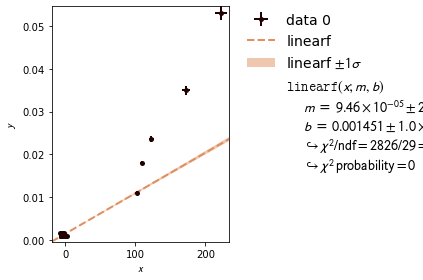

[[3.82566404e-12 1.49466254e-11]
 [1.49466254e-11 1.06750356e-10]]
My_A: 63.57048527413987
Fehler auf My_A: 0.0001311727896572242


In [3]:
#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x=x_data
y=y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    xy_data.add_error(axis='x', err_val=x_err) # x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) # y-Fehlerbalken
    linear_fit = Fit(data=xy_data, model_function=linearf) # Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report()
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('240c_My_A_Fit.jpg', dpi = 300)
    plt.show() #Plot anzeigen
    return fit_results

# Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])




#My_A berechnen
My_A = m/My_0
print("My_A:", My_A)

#Fehlerrechnung
s1 = (1/My_0)*Vm
s2 = (-m/My_0**2)*My_0_err
My_A_err = (s1**2+s2**2)**(1/2)
print("Fehler auf My_A:", My_A_err)
